In [1]:
!git clone https://github.com/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN
!pip install -r requirements.txt
# download model weights
!gdown https://drive.google.com/uc?id=1pG2S3sYvSaO0V0B8QPOl1RapPHpUGOaV -O weights/RealESRGAN_x2.pth
!gdown https://drive.google.com/uc?id=1SGHdZAln4en65_NQeQY9UjchtkEF9f5F -O weights/RealESRGAN_x4.pth
!gdown https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j -O weights/RealESRGAN_x8.pth

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 13), reused 33 (delta 5), pack-reused 0
Unpacking objects: 100% (46/46), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1pG2S3sYvSaO0V0B8QPOl1RapPHpUGOaV
To: /content/Real-ESRGAN/weights/RealESRGAN_x2.pth
100% 67.1M/67.1M [00:00<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SGHdZAln4en65_NQeQY9UjchtkEF9f5F
To: /content/Real-ESRGAN/weights/RealESRGAN_x4.pth
100% 67.0M/67.0M [00:00<00:00, 71.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j
To: /content/Real-ESRGAN/weights/RealESRGAN_x8.pth
100% 67.2M/67.2M [00:00<00:00, 168MB/s]


In [2]:
import os
from google.colab import files
import shutil

upload_folder = 'inputs'
result_folder = 'results'

os.makedirs(upload_folder, exist_ok=True)
os.makedirs(result_folder, exist_ok=True)


In [3]:
from realesrgan import RealESRGAN
from PIL import Image
import numpy as np
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth')

device: cuda


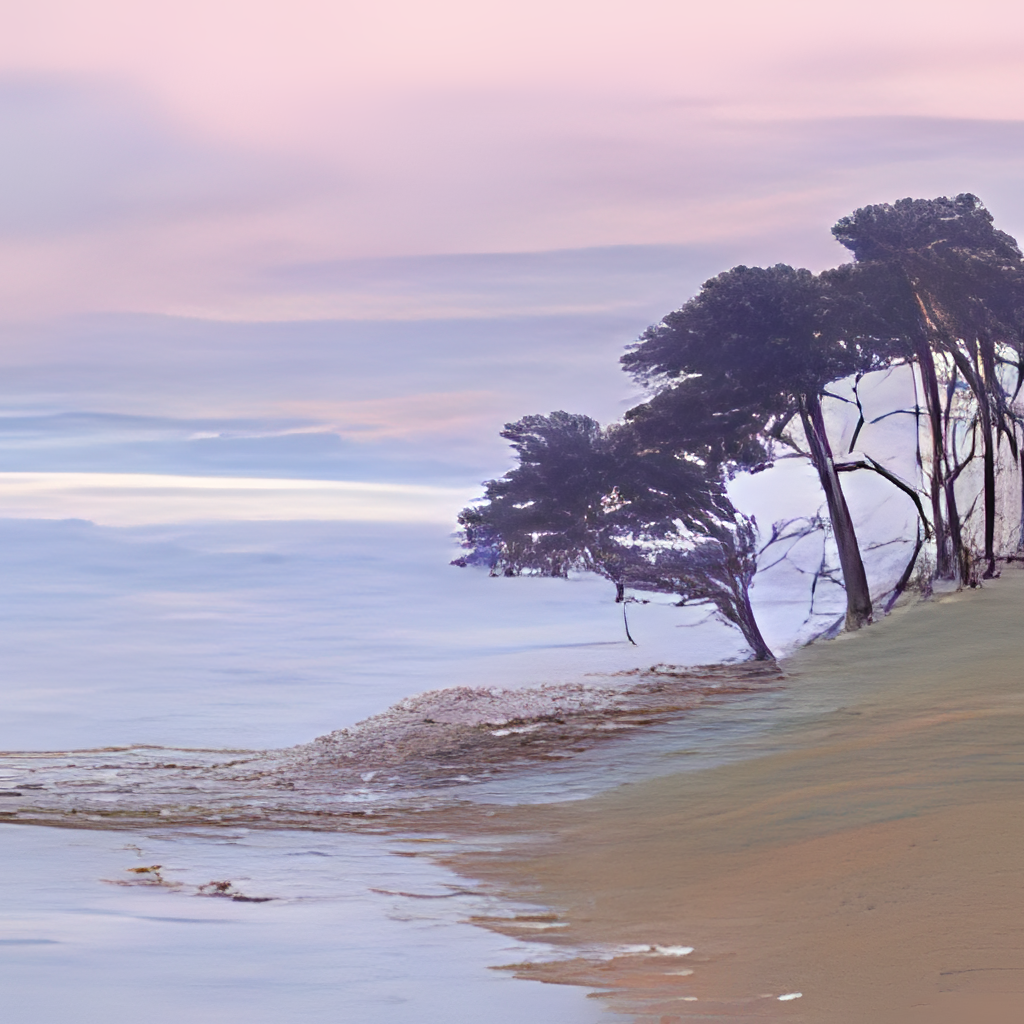

In [4]:
path_to_image = 'inputs/1.png'
result_image_path = 'results/sr_1.png'

image = Image.open(path_to_image).convert('RGB')
sr_image = model.predict(np.array(image))

sr_image.save(result_image_path)
sr_image

In [6]:
model = RealESRGAN(device, scale=8)
model.load_weights('weights/RealESRGAN_x8.pth')

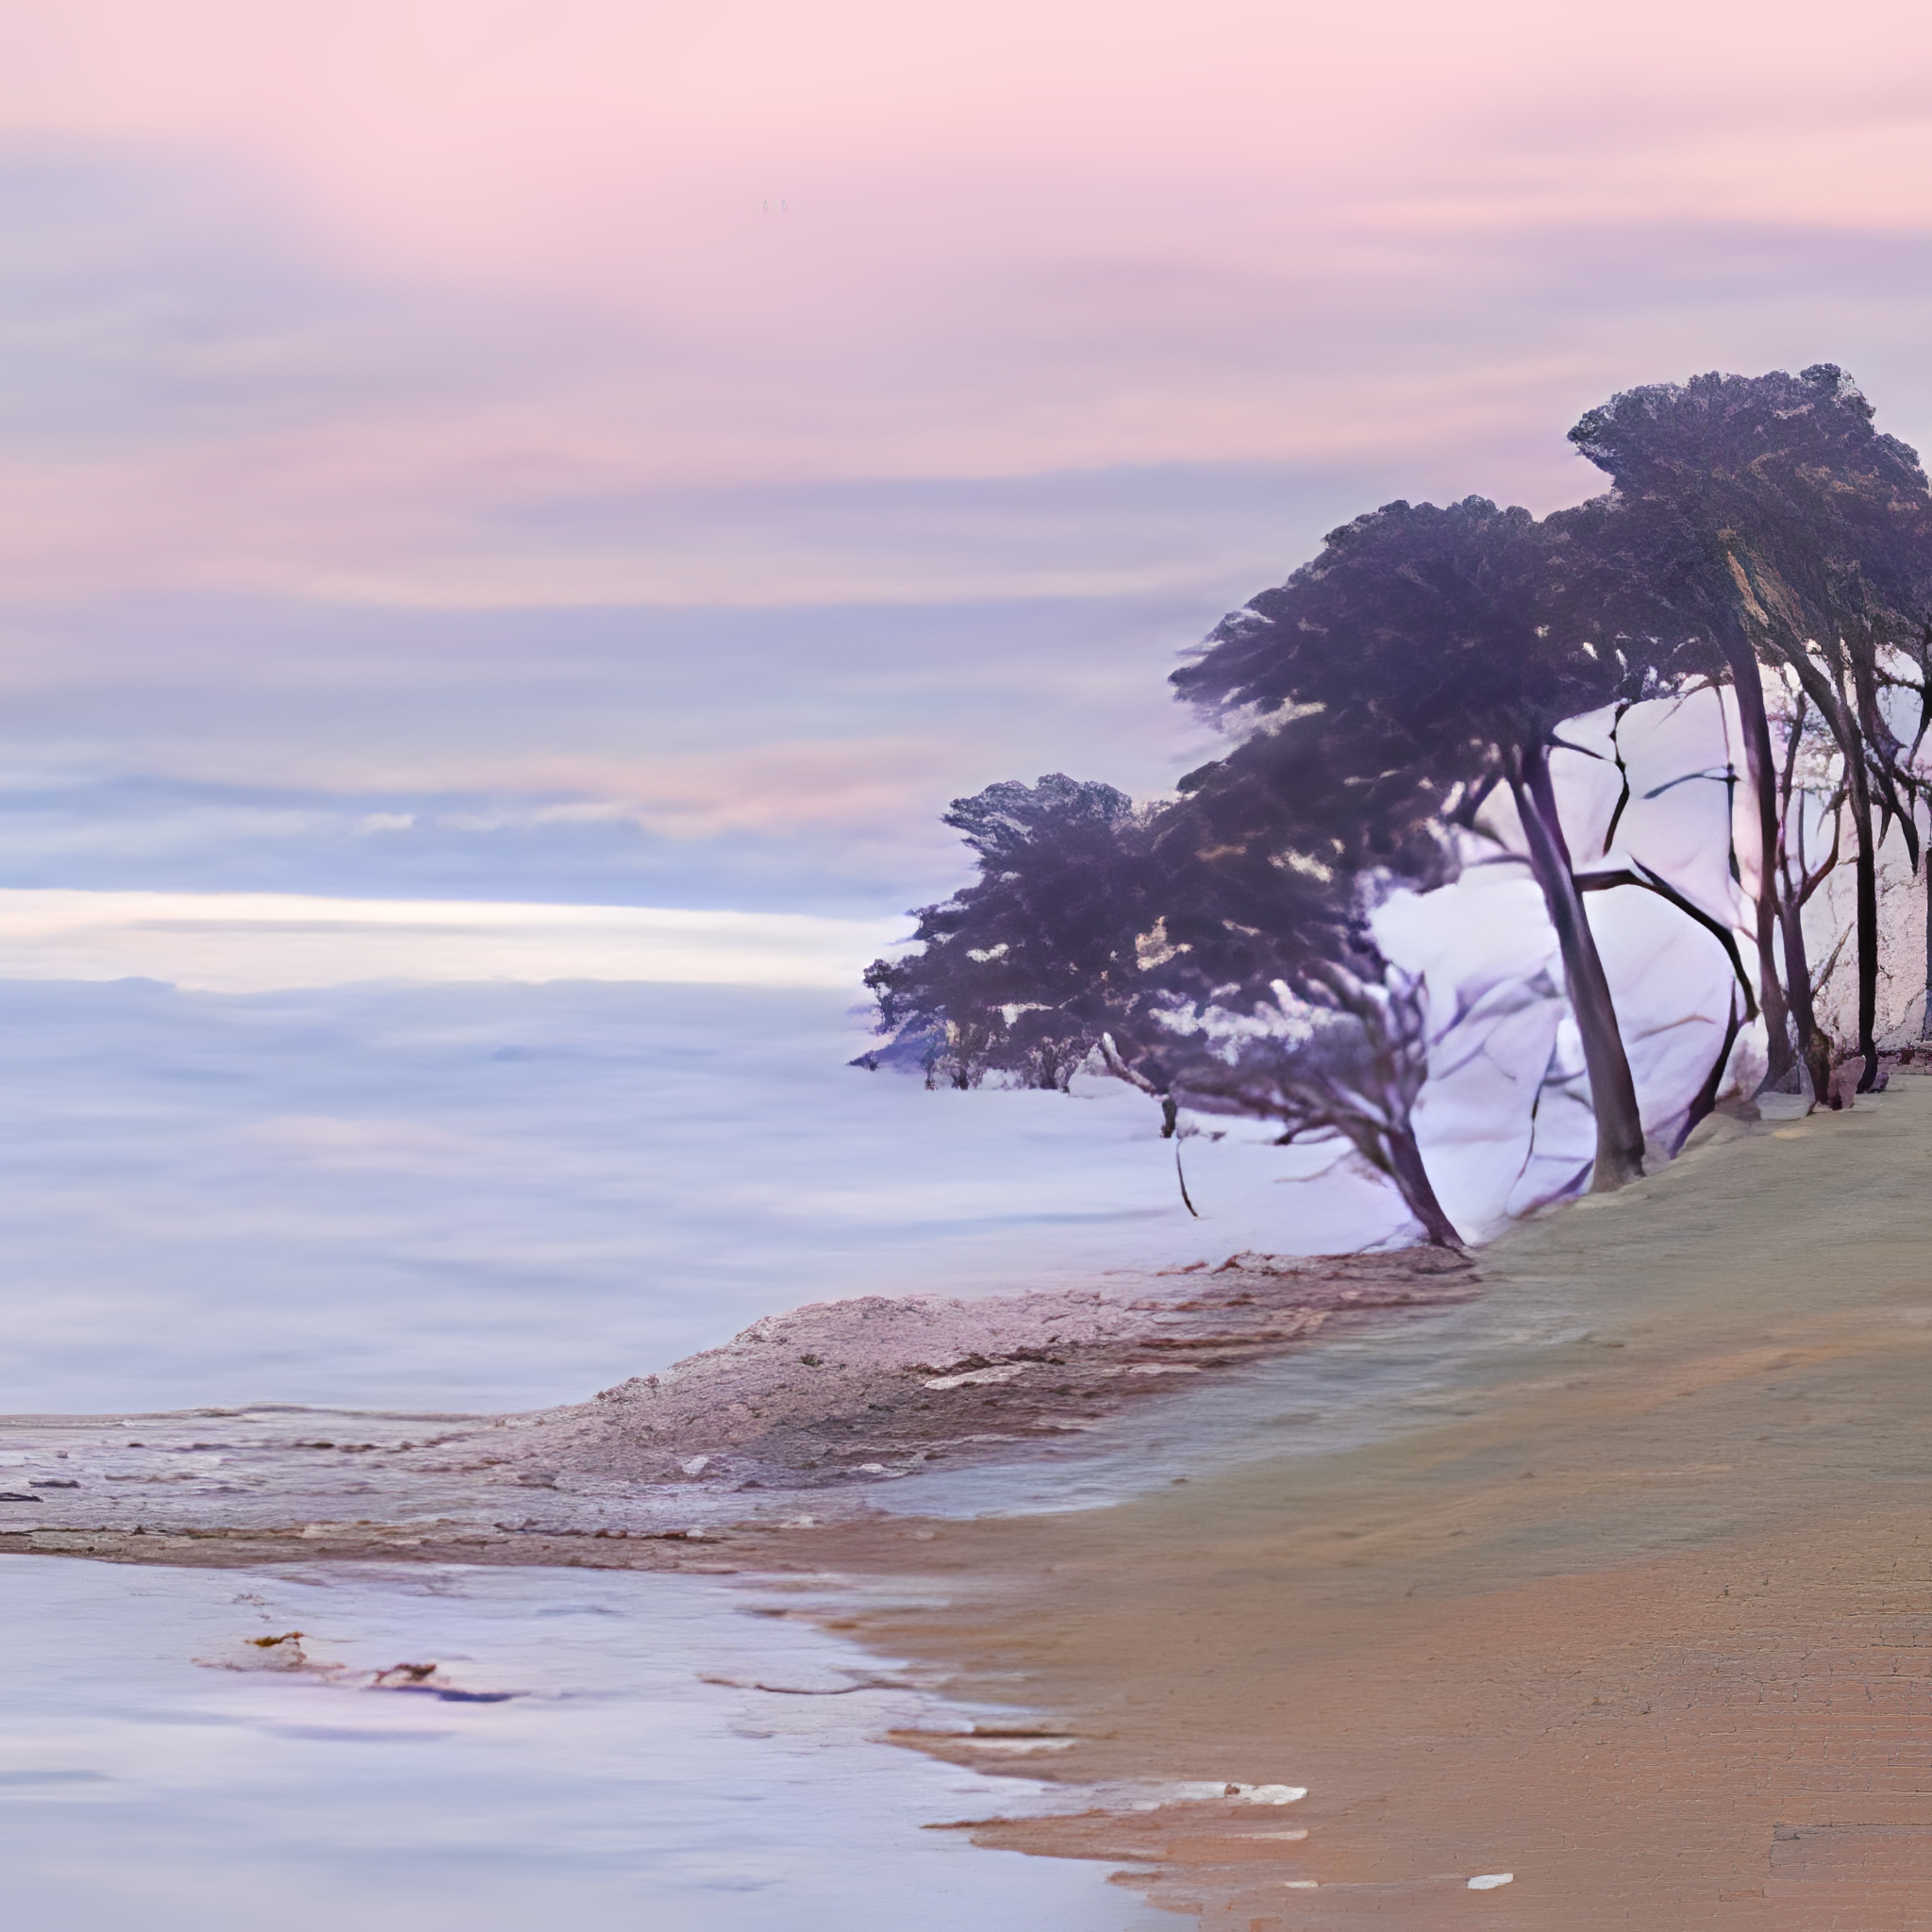

In [8]:
path_to_image = 'inputs/1.png'
result_image_path = 'results/sr_2.png'

image = Image.open(path_to_image).convert('RGB')
sr_image = model.predict(np.array(image))

sr_image.save(result_image_path)
sr_image